<a href="https://colab.research.google.com/github/PrettyCharity/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Extracting the data
# Load the libraries
import urllib.request
import tarfile
import numpy as np
import matplotlib.pyplot as plt
# Get the files
genomics_link = "https://bit.ly/3Ki2sMN"
ftp_stream = urllib.request.urlopen(genomics_link)
tar_file = tarfile.open(fileobj = ftp_stream, mode="r|gz")
tar_file.extractall('./')
tar_file.close()

In [ ]:
#@title Load the data
X = np.load('/content/data/p2_unsupervised/X.npy')
X_log = np.log2(X + 1) 
print('Number of cells: {} and number of genes {}'.format(X.shape[0], X.shape[1]))

Number of cells: 2169 and number of genes 45768


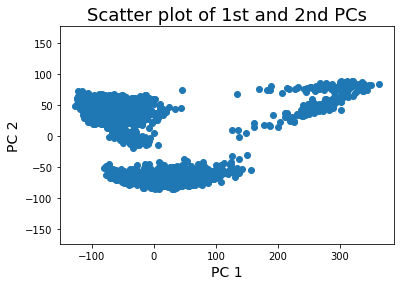

In [ ]:
#@title Visualizing with Principal component analysis
from sklearn.decomposition import PCA

X_log_pca = PCA().fit_transform(X_log)
plt.scatter(X_log_pca[:, 0], X_log_pca[:, 1])
plt.title("Scatter plot of 1st and 2nd PCs", size=18)
plt.xlabel("PC 1", size=14)
plt.ylabel("PC 2", size=14)
plt.axis("equal")
plt.show()

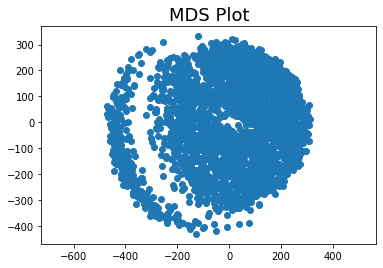

In [ ]:
#@title Visualizing with Multidimensional scaling
from sklearn.manifold import MDS
mds = MDS(n_components=2, verbose=1, eps=1e-5)
mds.fit(X_log)
# Plotting the data with MDS visualization technique
plt.scatter(mds.embedding_[:, 0], mds.embedding_[:, 1])
plt.title('MDS Plot', size=18)
plt.axis("equal")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


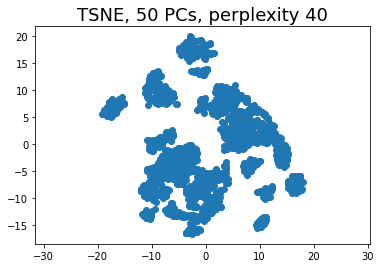

In [ ]:
#@title t-distributed Stochastic Neighbor Embedding visualization
from sklearn.manifold import TSNE
# Visualizing the log-transfomed data 
tsne = TSNE(n_components=3, verbose=0, perplexity=40)
X_log_tsne = tsne.fit_transform(X_log_pca[:, 0:50])
# Plotting the data with TSNE visualization technique
plt.scatter(X_log_tsne[:, 0], X_log_tsne[:, 1])
plt.title('TSNE, 50 PCs, perplexity 40', size=18)
plt.axis('equal')
plt.show()

## Visualizing with K-means clustering

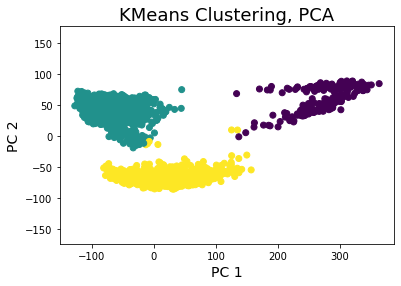

In [ ]:
#@title - PCA
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters= 3, n_init=10).fit_predict(X_log_pca[:, 0:50])
plt.scatter(X_log_pca[:, 0], X_log_pca[:, 1], c=kmeans_pca)
plt.title("KMeans Clustering, PCA", size=18)
plt.xlabel('PC 1', size=14)
plt.ylabel('PC 2', size=14)
plt.axis("equal")
plt.show()

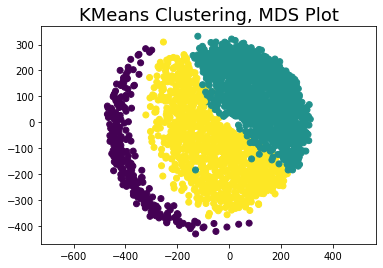

In [ ]:
#@title - MDS
plt.scatter(mds.embedding_[:, 0], mds.embedding_[:, 1], c=kmeans_pca)
plt.title("KMeans Clustering, MDS Plot", size=18)
plt.axis("equal")
plt.show()

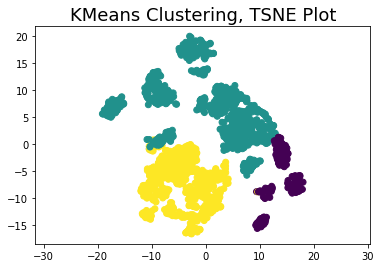

In [ ]:
#@title - t-SNE
plt.scatter(X_log_tsne[:,0], X_log_tsne[:,1], c=kmeans_pca)
plt.title("KMeans Clustering, TSNE Plot",size=18)
plt.axis("equal")
plt.show()